# Seattle AirBnB Data Analysis

This project will follow CRISP-DM data science process. It has 6 major phases:
1. Business understanding
2. Data understanding 
3. Data preparing
4. Data Modeling
5. Result Evaluation
6. Deployment (excluded in this project)

## 1. Business understanding

Airbnb, which stands for Air Bed and Breakfast, is a community marketplace for booking and renting rooms and apartments, based in Silicon Valley, California founded in 2008, similar to an online ordering system. According to Wikipedia, more than 10 million overnight stays were booked through Airbnb from 2008 to 2012. There are over 4 million listings for rentals in more than 190 countries (as of August 2017).

In this project, we are going to answer three business questions:
* Question 1: What amenities do Seattle rooms have?
* Question 2: What relates to the price of rooms in Seattle?
* Question 3: When is a good time to book a room in Seattle?


## 2. Data understanding

This dataset describes the listing activity of homestays in Seattle, Washington in 2016. It contains three files:
* Listings.csv, including full descriptions and average review score
* Reviews.csv, including unique identifiers for each reviewer and detailed comments
* Calendar.csv, including listing id and the price and availability for that day

In this project, we need **Listing** & **Calendar** data to answer the three above business questions. Now, we will explore the number of rows, columns, datatype, missing data of each dataframe.

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings 
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
# import data
listings = pd.read_csv('../dataset_SeattleAirbnb/listings.csv')
calendar = pd.read_csv('../dataset_SeattleAirbnb/calendar.csv')

### 2.1 Listings data understanding

First of all, we see how many rows and columns of listings.

In [3]:
#check number of rows & columns
print('Listing has ' + str(listings.shape[0]) + ' rows, ' + str(listings.shape[1]) + ' columns.')

Listing has 3818 rows, 92 columns.


In [4]:
# view sample
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Check columns of listings with columns name, number of data, data type, missing data

In [5]:
# data type & count of each columns
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<BarContainer object of 45 artists>

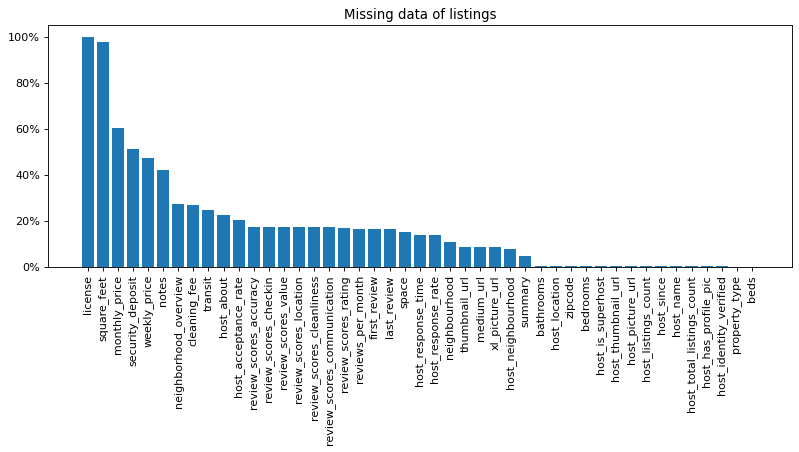

In [6]:
#missing data
missing_cols = listings.columns[listings.isnull().sum() > 0]
missing_df = (listings[missing_cols].isnull().sum()/ listings.shape[0] * 100).sort_values(ascending=False)

# visualize missing data
fig, ax = plt.subplots(figsize = (12, 4), dpi = 80)
ax.set(title='Missing data of listings')
ax.tick_params(axis='x', labelrotation = 90)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.bar(missing_df.index, missing_df)

### 2.2 Calendar data understanding

View number of rows, columns and sample of calendar data:

In [7]:
#check number of rows & columns
print('Calendars has ' + str(calendar.shape[0]) + ' rows, ' + str(calendar.shape[1]) + ' columns.')

Calendars has 1393570 rows, 4 columns.


In [8]:
# view sample
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Check columns of calendar data with columns name, number of data, data type, missing data:

In [9]:
# data type & count of each columns
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
#missing data
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

Check range date of calendar

In [11]:
print('The first date is %s and the last date is %s.' %(calendar['date'].min(), calendar['date'].max()))

The first date is 2016-01-04 and the last date is 2017-01-02.


## 3. Data preparing

Before modeling data, we need to prepare data. This stage includes some actions:

- Removing unnecessary columns
- Extracting, splitting data
- Formatting data
- Dealing with missing data

### 3.1 Listing data preparation

**Choose columns, which relavant to reservation price, rating score.**

In [12]:
chose_cols = [
    'host_since', 'host_response_time', 'host_response_rate','host_is_superhost', 'host_listings_count', 
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
    'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 
    'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification',
    'calculated_host_listings_count'
]

cleaned_listing = listings[chose_cols]
cleaned_listing.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,...,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2
1,2013-02-21,within an hour,98%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6
2,2014-06-12,within a few hours,67%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,House,...,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2
3,2013-11-06,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Queen Anne,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1
4,2011-11-29,within an hour,100%,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,House,...,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1


**Split a column of list into multiple columns.**

As you can see, host_verifications and amenities columns contain a list of values. We need to split them into columns which just contain a single value.

In [13]:
def split_multiple_values_columns(df, col_name):
    #extract unique values
    unique_values = set()
    
    for unique_list in df[col_name].unique():
        values = unique_list.replace('[', '').replace("]", '').replace("{", '').replace('}', '').replace('"', '').replace("'", '').split(sep=',')
        values = filter(None, [item.strip() for item in values])
        unique_values.update(values)
    
    #split column
    for unique_value in unique_values:
        df[(col_name + '_' + unique_value)] = np.where(df[col_name].str.contains(unique_value), 1, 0)
    

split_multiple_values_columns(cleaned_listing,'host_verifications')
cleaned_listing.drop(columns = ['host_verifications'], inplace=True)

split_multiple_values_columns(cleaned_listing,'amenities')
cleaned_listing.drop(columns = ['amenities'], inplace=True)

cleaned_listing.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,...,amenities_Laptop Friendly Workspace,amenities_Kitchen,amenities_TV,amenities_Doorman,amenities_Smoke Detector,amenities_Indoor Fireplace,amenities_24-Hour Check-in,amenities_Carbon Monoxide Detector,amenities_Essentials,amenities_Buzzer/Wireless Intercom
0,2011-08-11,within a few hours,96%,f,3.0,t,t,Queen Anne,Apartment,Entire home/apt,...,0,1,1,0,0,0,0,0,0,0
1,2013-02-21,within an hour,98%,t,6.0,t,t,Queen Anne,Apartment,Entire home/apt,...,0,1,1,0,1,0,0,1,1,1
2,2014-06-12,within a few hours,67%,f,2.0,t,t,Queen Anne,House,Entire home/apt,...,0,1,1,0,1,1,0,1,1,0
3,2013-11-06,NaN,NaN,f,1.0,t,t,Queen Anne,Apartment,Entire home/apt,...,0,1,0,0,1,1,0,1,1,0
4,2011-11-29,within an hour,100%,f,2.0,t,t,Queen Anne,House,Entire home/apt,...,0,1,1,0,1,0,0,1,1,0


**Transform data.**

Next step, we need to transform format of price, extra_people, host_response_rate columns from currency string to float,
and extract the year from host_since column.

In [14]:
#change currency columns to float data type
cleaned_listing['price'] = cleaned_listing['price'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))
cleaned_listing['extra_people'] = cleaned_listing['extra_people'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))
cleaned_listing['host_response_rate'] = cleaned_listing['host_response_rate'].apply(lambda x : float(str(x).replace("%", "")))

#transform date to year
cleaned_listing['host_since_year'] = pd.to_datetime(cleaned_listing['host_since']).dt.year
cleaned_listing.drop(columns=['host_since'], inplace= True)

#transform true-false to 1-0 values
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'
            , 'require_guest_profile_picture', 'require_guest_phone_verification']
for bool_col in bool_cols:
    cleaned_listing[bool_col] = cleaned_listing[bool_col].map({'t':1, 'f':0})
            
cleaned_listing.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,...,amenities_Kitchen,amenities_TV,amenities_Doorman,amenities_Smoke Detector,amenities_Indoor Fireplace,amenities_24-Hour Check-in,amenities_Carbon Monoxide Detector,amenities_Essentials,amenities_Buzzer/Wireless Intercom,host_since_year
0,within a few hours,96.0,0.0,3.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,4,...,1,1,0,0,0,0,0,0,0,2011.0
1,within an hour,98.0,1.0,6.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,4,...,1,1,0,1,0,0,1,1,1,2013.0
2,within a few hours,67.0,0.0,2.0,1.0,1.0,Queen Anne,House,Entire home/apt,11,...,1,1,0,1,1,0,1,1,0,2014.0
3,NaN,NaN,0.0,1.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,3,...,1,0,0,1,1,0,1,1,0,2013.0
4,within an hour,100.0,0.0,2.0,1.0,1.0,Queen Anne,House,Entire home/apt,6,...,1,1,0,1,0,0,1,1,0,2011.0


**Fill missing data.**

The listing dataframe exists null-columns. Next, we are going to fill missing data for metric columns with mean and categorical columns with mode.

In [15]:
# filling categorical columns with mode
mode_cols = ['host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'host_since_year','bathrooms', 'bedrooms', 'beds']
fill_mode = lambda col : col.fillna(col.mode()[0])
cleaned_listing[mode_cols] = cleaned_listing[mode_cols].apply(fill_mode)

# filling categorical columns with mean
mean_cols = [ 'host_response_rate','host_listings_count', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
             ,'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
fill_mean = lambda col : col.fillna(col.mean())
cleaned_listing[mean_cols] = cleaned_listing[mean_cols].apply(fill_mean)

# check if any null columns
cleaned_listing.columns[cleaned_listing.isnull().sum() > 0]

Index([], dtype='object')

### 3.2 Calendar data Preparation

**Extract month, year from date of calendar**

In [16]:
cleaned_calendar = calendar.copy()
cleaned_calendar['month'] = pd.to_datetime(cleaned_calendar['date']).dt.month
cleaned_calendar['year'] = pd.to_datetime(cleaned_calendar['date']).dt.year
cleaned_calendar.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,$85.00,1,2016
1,241032,2016-01-05,t,$85.00,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016


**Transform price into float data type**

In [17]:
cleaned_calendar['price'] = cleaned_calendar['price'].apply(lambda x : float(str(x).replace("$", "").replace(',', '')))

#change available to number 1: true, 0: false
cleaned_calendar['available_num'] = cleaned_calendar['available'].map({'t':1, 'f':0 })
cleaned_calendar.drop(columns=['available'], inplace = True)

cleaned_calendar.head()

,listing_id,date,price,month,year,available_num
0,241032,2016-01-04,85.0,1,2016,1
1,241032,2016-01-05,85.0,1,2016,1
2,241032,2016-01-06,NaN,1,2016,0
3,241032,2016-01-07,NaN,1,2016,0
4,241032,2016-01-08,NaN,1,2016,0


**Drop rows if missing price value**

In [18]:
cleaned_calendar = cleaned_calendar.dropna(subset = ['price'])
cleaned_calendar.shape

(934542, 6)

## 4. Data Modeling

To answer the second business question, we are able to apply machine learning methods to explore which features influence the price the most. We will use ElasticNetCV model to train data and predict the price, then see the resulting important features.

In [19]:
def create_X_y(df, response_col):
    '''
    INPUT
    df - pandas dataframe 
    response_col - response column
    
    OUTPUT
    X - A matrix holding all of the features
    y - the corresponding response vector
    '''
    #1 Create X 
    X = df.drop(columns=[response_col]).copy()
    
    #2. Dummy columns for all the categorical variables in X, drop the original columns
    X_cats = X.select_dtypes(include=['object']).columns
    for col in X_cats:
        dum_df = pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)
        X = pd.concat([X.drop(columns=[col]), dum_df], axis=1)
        
    #3. Create y   
    y = df[response_col].copy()

    return X, y

    
# Create X and y
X, y = create_X_y(cleaned_listing, 'price')  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Train ElasticNetCV model
lm_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01, random_state = 42)
lm_model.fit(scaled_X_train, y_train)

# Predictive
y_test_preds = lm_model.predict(scaled_X_test)
y_train_preds = lm_model.predict(scaled_X_train)

# Evaluate Model
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

#Print training and testing score
print("R-squared -- train data set: %.3f,\t test data set: %.3f" %(train_score, test_score))
print('MSE\t  -- train data set: %.3f,\t test data set: %.3f' % (mean_squared_error(y_train, y_train_preds), mean_squared_error(y_test, y_test_preds)))

R-squared -- train data set: 0.588,	 test data set: 0.603
MSE	  -- train data set: 3283.646,	 test data set: 3397.850


## 5. Result Evaluation

### Question 1: What amenities do Seattle rooms have?

We will find what amenities rooms have and which ones are popular in Seattle.

In [20]:
def visualize_listing_barchart(x, y, title, xticklabels=None, ylabel=None, yticker = False):
    fig, ax = plt.subplots(figsize = (8,4) , dpi = 80)
    ax.set(title=title)
    ax.tick_params(axis='x', labelrotation = 90)
    if xticklabels:    
        ax.set_xticklabels(xticklabels)
    if ylabel:
        ax.set_ylabel(ylabel)
    if yticker:
        ax.yaxis.set_major_formatter(yticker)
        
    ax.bar(x, y)

In [21]:
amenities = [
    'amenities_Cat(s)', 'amenities_Suitable for Events', 'amenities_Indoor Fireplace', 
    'amenities_Laptop Friendly Workspace', 'amenities_Doorman', 'amenities_Family/Kid Friendly', 'amenities_TV', 
    'amenities_Smoke Detector', 'amenities_Air Conditioning', 'amenities_Smoking Allowed', 'amenities_Gym', 
    'amenities_Safety Card', 'amenities_Lock on Bedroom Door', 'amenities_Free Parking on Premises', 
    'amenities_Essentials', 'amenities_Washer','amenities_24-Hour Check-in', 'amenities_Carbon Monoxide Detector', 
    'amenities_Cable TV', 'amenities_Hair Dryer','amenities_Wheelchair Accessible', 'amenities_Elevator in Building', 
    'amenities_Washer / Dryer', 'amenities_Pool','amenities_Pets live on this property', 'amenities_Pets Allowed', 
    'amenities_Buzzer/Wireless Intercom', 'amenities_Heating', 'amenities_Wireless Internet', 'amenities_Hangers', 
    'amenities_First Aid Kit', 'amenities_Other pet(s)', 'amenities_Internet', 'amenities_Fire Extinguisher', 
    'amenities_Kitchen','amenities_Hot Tub', 'amenities_Iron','amenities_Breakfast', 'amenities_Dryer', 
    'amenities_Dog(s)', 'amenities_Shampoo'
]

# View number of rooms have each amenities
amenities_count = cleaned_listing[amenities].sum().sort_values(ascending=False)
amenities_count

amenities_Internet                      3692
amenities_Wireless Internet             3667
amenities_Heating                       3627
amenities_Kitchen                       3423
amenities_Smoke Detector                3281
amenities_Essentials                    3237
amenities_Dryer                         3114
amenities_Washer                        2992
amenities_TV                            2741
amenities_Shampoo                       2670
amenities_Carbon Monoxide Detector      2485
amenities_Fire Extinguisher             2196
amenities_Free Parking on Premises      2167
amenities_Family/Kid Friendly           1963
amenities_First Aid Kit                 1680
amenities_Cable TV                      1446
amenities_Indoor Fireplace               886
amenities_Pets live on this property     883
amenities_Hangers                        846
amenities_Elevator in Building           785
amenities_Hair Dryer                     774
amenities_Laptop Friendly Workspace      745
amenities_

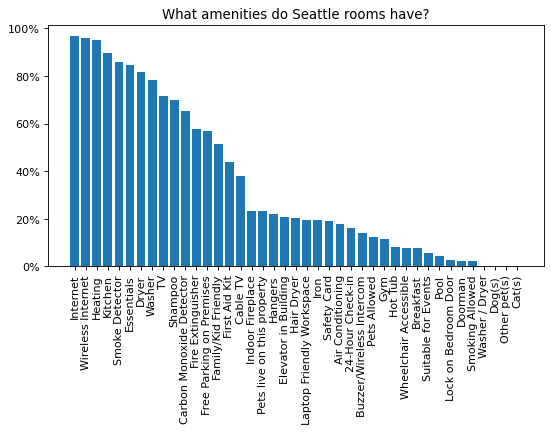

In [22]:
amenities_rate = amenities_count * 100/cleaned_listing.shape[0]
# visualize amenities rate
visualize_listing_barchart(amenities_rate.index, amenities_rate, 
                           'What amenities do Seattle rooms have?', 
                           xticklabels = [item.split('_')[1] for item in amenities_rate.index], 
                           yticker = mticker.PercentFormatter())

From the above analysis results, above 80% of rooms have internet, heating, kitchen, smoke detector, essentials. Few rooms (below 15%) have a gym, pool, provide breakfast. There's no rooms that has any pets, even a cat or dog.

### Question 2: What relates to the price of rooms in Seattle?

From the below trained model (Modeling step), we will explore which factors influence the price by look at coefficient of model.

In [23]:
def coef_weights(coefficients, features):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    features - the features of model
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    '''
    coefs_df = pd.DataFrame()
    coefs_df['features'] = features
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients.astype(float))
    
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train.columns)
top20_features = coef_df.sort_values(by='abs_coefs', axis=0, ascending=False).head(20)
top20_features

,features,coefs,abs_coefs
7,bedrooms,25.570215,25.570215
5,accommodates,18.606182,18.606182
6,bathrooms,15.534992,15.534992
116,room_type_Private room,-14.901492,14.901492
117,room_type_Shared room,-10.656075,10.656075
90,neighbourhood_group_cleansed_Downtown,8.751763,8.751763
86,neighbourhood_group_cleansed_Capitol Hill,7.266042,7.266042
96,neighbourhood_group_cleansed_Queen Anne,5.645832,5.645832
20,review_scores_value,-4.356926,4.356926
13,number_of_reviews,-4.181438,4.181438


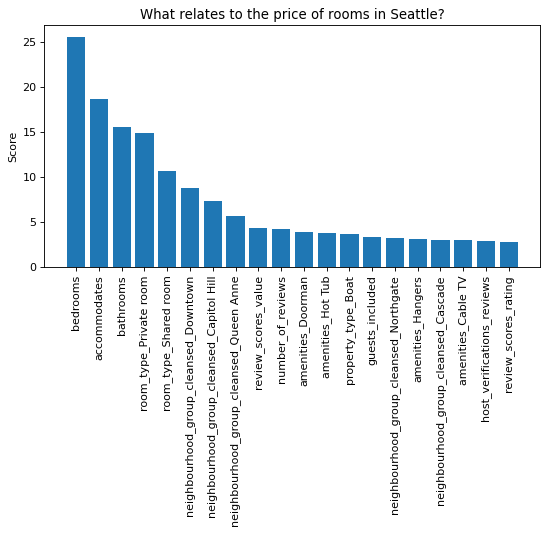

In [24]:
# visualize top 20 features
visualize_listing_barchart(top20_features['features'], top20_features['abs_coefs'], 
                           title = 'What relates to the price of rooms in Seattle?', 
                           ylabel='Score')

The bedroom appears to be one of the top indicators for the price. Some other basic characteristics of rooms such as bathrooms, accommodation, room type, and amenities also affect the price. In addition, neighborhoods (Downtown, Capitol Hill, Queen Anne) can also affect the price.

The more the number of reviews is, the lower the price is likely. However, the higher the review scores rating is, the higher the price is likely.

### Question 3: When is the good time to book AirBnB in Seattle?

We base on availability and price of rooms to choose a good time to book a room in Seattle.

In the calendar dataframe, the range of dates which rooms are available and have price value is from 2016-01-04 to 2017-01-02. We will explore availability and price by month in 2016.

In [25]:
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def visualize_calendar_linechart(x, y, title, y_label=None, yticker = False):
    fig, ax = plt.subplots(figsize = (10, 5), dpi = 80)
    ax.set(title=title)
    ax.set_xticks(x)
    ax.set_xticklabels(month_label)
    if y_label :
        ax.set_ylabel(y_label)
    if yticker:
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    ax.plot(x, y, linestyle='-')

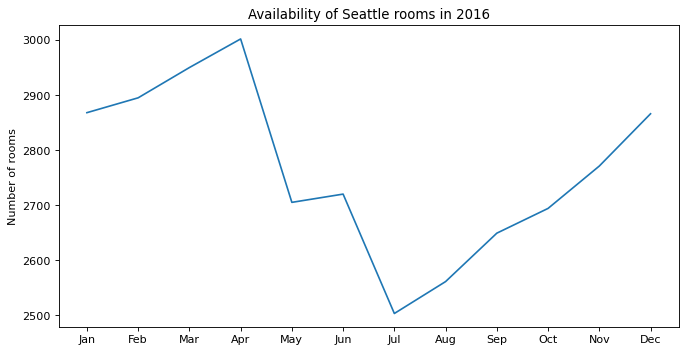

In [26]:
available_df = cleaned_calendar[cleaned_calendar['year'] == float(2016)].groupby(['month'])['listing_id'].nunique()
visualize_calendar_linechart(x=available_df.index, y=available_df, 
                      title = 'Availability of Seattle rooms in 2016', y_label = 'Number of rooms')

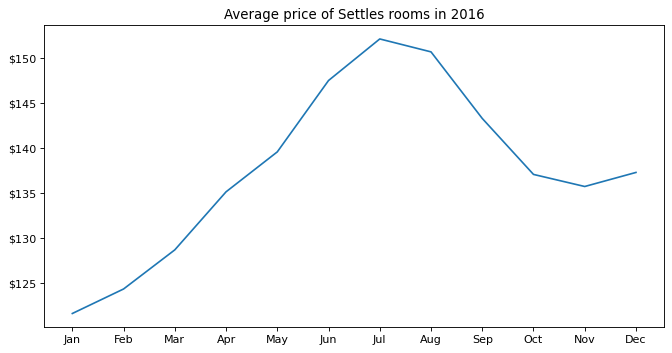

In [27]:
price_df = cleaned_calendar[cleaned_calendar['year'] == float(2016)].groupby(['month'])['price'].mean()
visualize_calendar_linechart(x=price_df.index, y= price_df, 
                      title='Average price of Settles rooms in 2016', yticker = True)

From the two above graphs, we see that a good time to book a Seattle room is from January to April. In this period of the year, it's highest availability and lowest price. Conversely, we should consider if we book it from May to September because of the busier time and the higher price.

## Conclusion

In this project, we have tried to explore some information for booking a room in Seattle.

Firstly, almost of the rooms have internet, heating, kitchen, smoke detector, essentials. No room has any pets even a dog or cat.

Secondly, we know some factors which influence the reservation price. The top indicators are basic characteristics of rooms such as bedrooms, bathrooms, accommodates, room type, and amenities. In addition, neighborhood (Downtown, Capitol Hill, Queen Anne) can also affect the price. Besides that, the number of reviews and review scores might also appear to be one of the top indicators.

Finally, we know when is a good time to book a room in Seattle with the lower price and higher availability. It's from January to April.